In [2]:
!pip install tsfel
!pip install pandas
!pip install numpy
!pip install sci-kit learn
!pip install matplotlib
!pip install tsfel
import pandas as pd
import numpy as np
import tsfel
from itertools import product
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
from functions import *

ERROR: Could not find a version that satisfies the requirement sci-kit (from versions: none)
ERROR: No matching distribution found for sci-kit


In [3]:
sub1_laying = pd.read_csv('../Task4-raw/ProcessedData/Aarsh_laying_1.csv')

sub2_laying = pd.read_csv('../Task4-raw/ProcessedData/Abhinav_laying_1.csv')

sub3_laying = pd.read_csv('../Task4-raw/ProcessedData/Arjun_laying_1.csv')

sub4_laying = pd.read_csv('../Task4-raw/ProcessedData/Hari_laying_1.csv')

sub1_sitting = pd.read_csv('../Task4-raw/ProcessedData/Aarsh_Sitting_1.csv')

sub2_sitting = pd.read_csv('../Task4-raw/ProcessedData/Abhinav_sitting_1.csv')

sub3_sitting = pd.read_csv('../Task4-raw/ProcessedData/Arjun_sitting_1.csv')

sub4_sitting = pd.read_csv('../Task4-raw/ProcessedData/Hari_Sitting_1.csv')


sub1_standing = pd.read_csv('../Task4-raw/ProcessedData/Aarsh_standing_1.csv')

sub2_standing = pd.read_csv('../Task4-raw/ProcessedData/Abhinav_standing_1.csv')

sub3_standing = pd.read_csv('../Task4-raw/ProcessedData/Arjun_standing_1.csv')

sub4_standing = pd.read_csv('../Task4-raw/ProcessedData/Hari_standing_1.csv')


sub1_walking = pd.read_csv('../Task4-raw/ProcessedData/Aarsh_Walking_1.csv')

sub2_walking = pd.read_csv('../Task4-raw/ProcessedData/Abhinav_walking_1.csv')

sub3_walking = pd.read_csv('../Task4-raw/ProcessedData/Arjun_walking_1.csv')

sub4_walking = pd.read_csv('../Task4-raw/ProcessedData/Hari_walking_1.csv')


sub1_walking_upward = pd.read_csv('../Task4-raw/ProcessedData/Aarsh_Walking_Upstairs.csv')

sub2_walking_upward = pd.read_csv('../Task4-raw/ProcessedData/Abhinav_Walking_Upstairs_1.csv')

sub3_walking_upward = pd.read_csv('../Task4-raw/ProcessedData/Arjun_Walking_upstairs_1.csv')

sub4_walking_upward = pd.read_csv('../Task4-raw/ProcessedData/Hari_Walking_upstairs_1.csv')


sub1_walking_downward = pd.read_csv('../Task4-raw/ProcessedData/Aarsh_Walking_downstairs.csv')
sub2_walking_downward = pd.read_csv('../Task4-raw/ProcessedData/Abhinav_Walking_Downstairs_1.csv')

sub3_walking_downward = pd.read_csv('../Task4-raw/ProcessedData/Arjun_Walking_downstairs.csv')

sub4_walking_downward = pd.read_csv('../Task4-raw/ProcessedData/Hari_Walking_downstairs.csv')


y_label = [6,6,6,6,4,4,4,4,5,5,5,5,1,1,1,1,3,3,3,3,2,2,2,2]

X_testing = pd.concat([sub1_laying,sub2_laying,sub3_laying,sub4_laying,sub1_sitting,sub2_sitting,sub3_sitting,sub4_sitting,sub1_standing,sub2_standing,sub3_standing,sub4_standing,sub1_walking,sub2_walking,sub3_walking,sub4_walking,sub1_walking_downward,sub2_walking_downward,sub3_walking_downward,sub4_walking_downward,sub1_walking_upward,sub2_walking_upward,sub3_walking_upward,sub4_walking_upward]).reset_index(drop=True)

X_testing

,gFx,gFy,gFz
0,0.657008,-0.314774,-0.759454
1,0.693369,-0.072888,-0.725412
2,0.568873,0.064632,-0.635860
3,0.685740,-0.259948,-0.748174
4,0.840807,-0.356107,-0.813264
...,...,...,...
11995,0.908980,-0.613623,0.003553
11996,0.833684,-0.567159,0.008732
11997,0.778526,-0.523211,0.016914
11998,0.765022,-0.480758,-0.021552


In [4]:
X_train = np.array(np.load("../X_train.npy"))
X_test = np.array(np.load("../X_test.npy"))
Y_train = np.array(np.load("../Y_train.npy"))
Y_test = np.array(np.load("../Y_test.npy"))

In [5]:
data = X_testing.to_numpy()
n_chunks = len(data) // 500
reshaped_array = data.reshape(n_chunks, 500, 3)

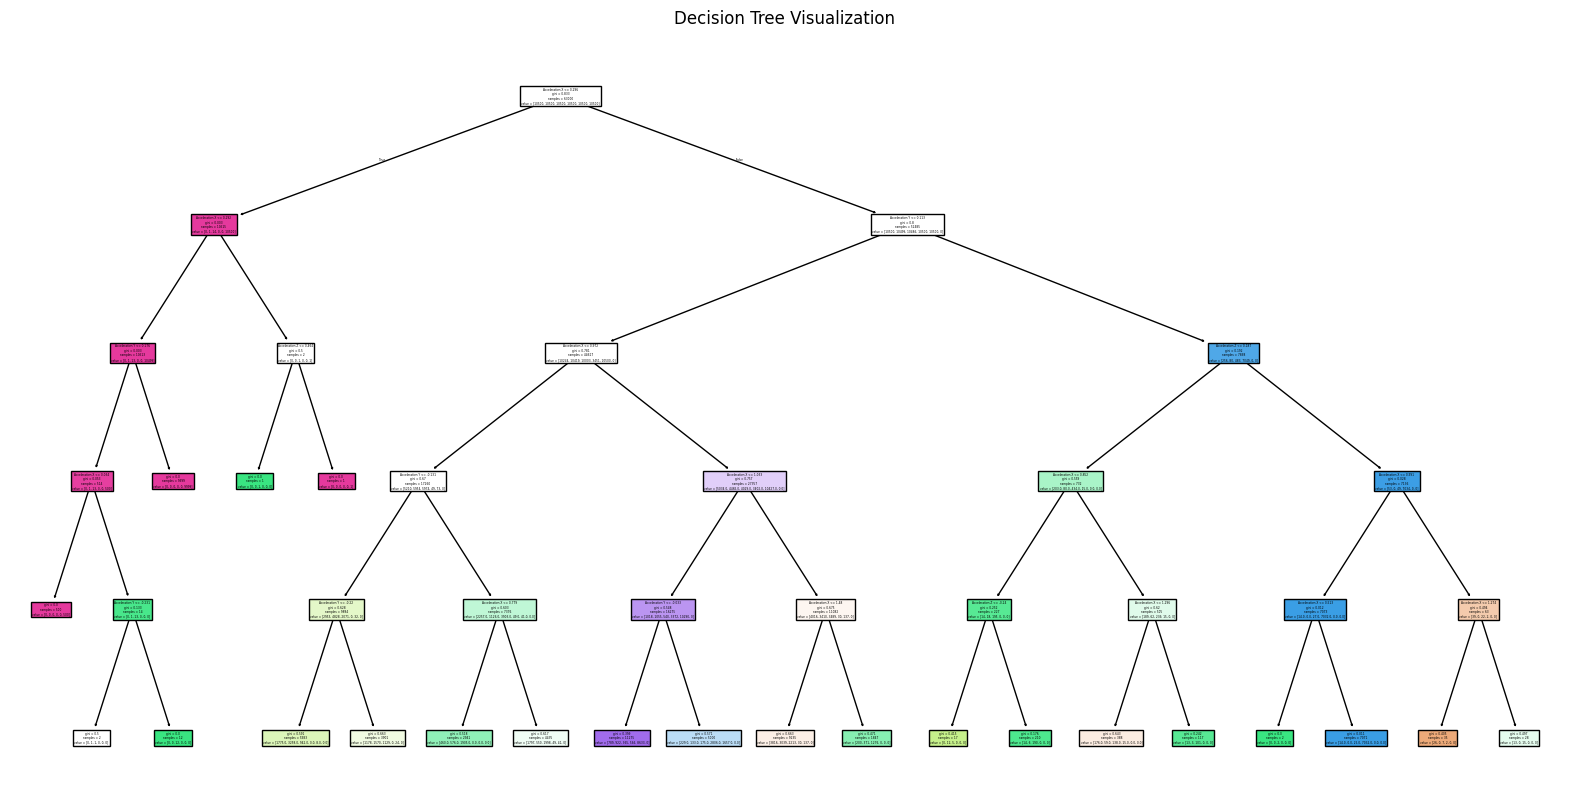

Accuracy: 0.1250
Recall: 0.1250
Precision: 0.5643

Confusion Matrix:

   1  2  3  4  5  6
1  1  3  0  0  0  0
2  2  1  1  0  0  0
3  0  4  0  0  0  0
4  0  4  0  0  0  0
5  0  4  0  0  0  0
6  0  3  0  0  0  1



In [6]:
decision_tree_raw2(reshaped_array,X_train,y_label,Y_train,5)
print()

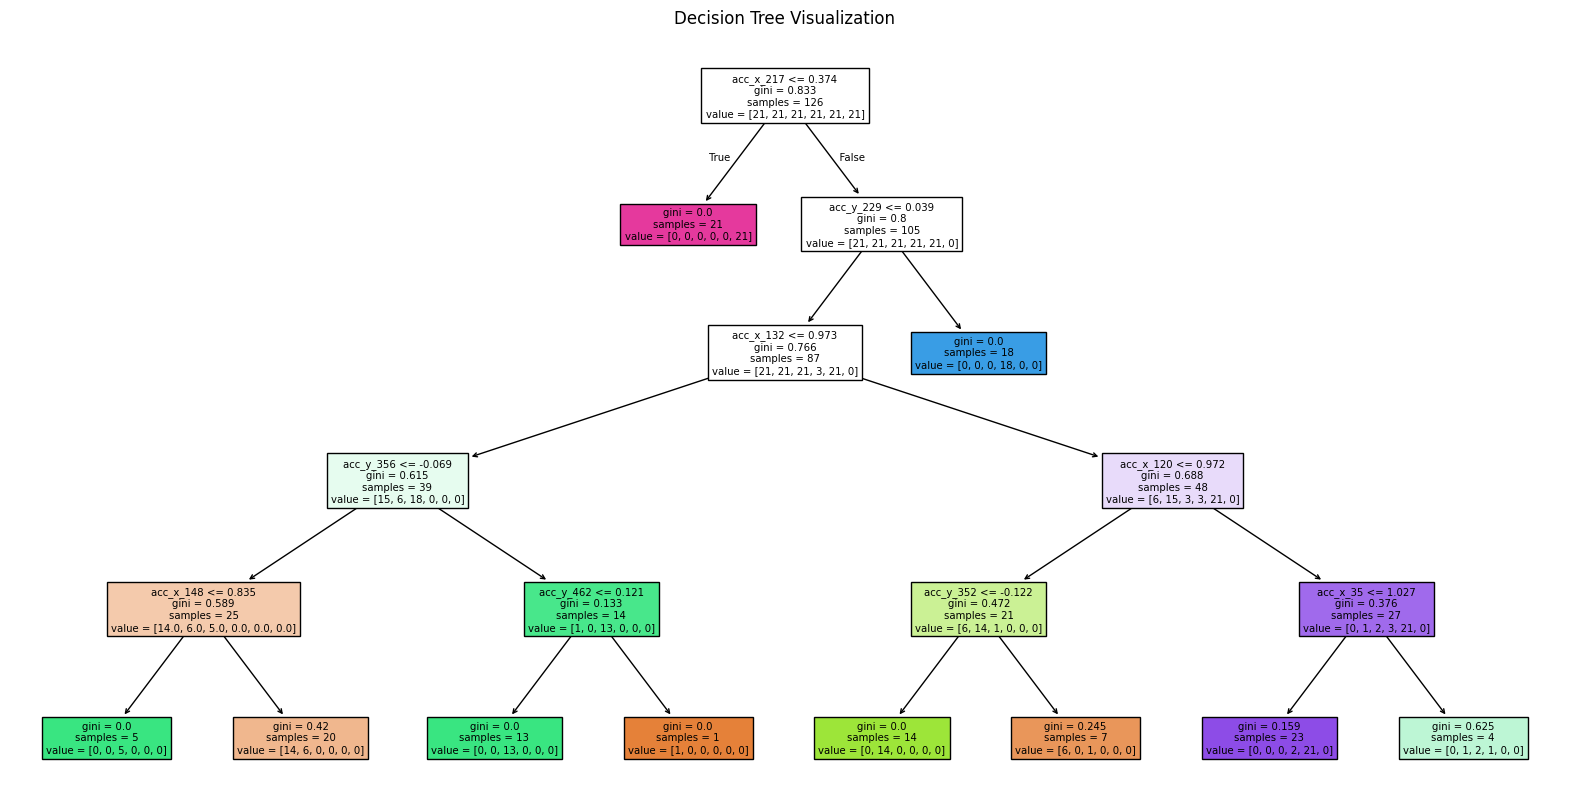

Accuracy: 0.2083
Recall: 0.2083
Precision: 0.1833

Confusion Matrix:

   1  2  3  4  5  6
1  1  0  3  0  0  0
2  1  0  2  0  1  0
3  2  1  0  1  0  0
4  2  0  2  0  0  0
5  4  0  0  0  0  0
6  0  0  0  0  0  4



In [7]:
decision_tree_raw(reshaped_array,X_train,y_label,Y_train,5)
print()

In [8]:
cfg = tsfel.get_features_by_domain()
feature_df = tsfel.time_series_features_extractor(cfg, X_train, verbose = 0, fs = 50)
feature_df_test = tsfel.time_series_features_extractor(cfg, reshaped_array, verbose = 0, fs = 50)

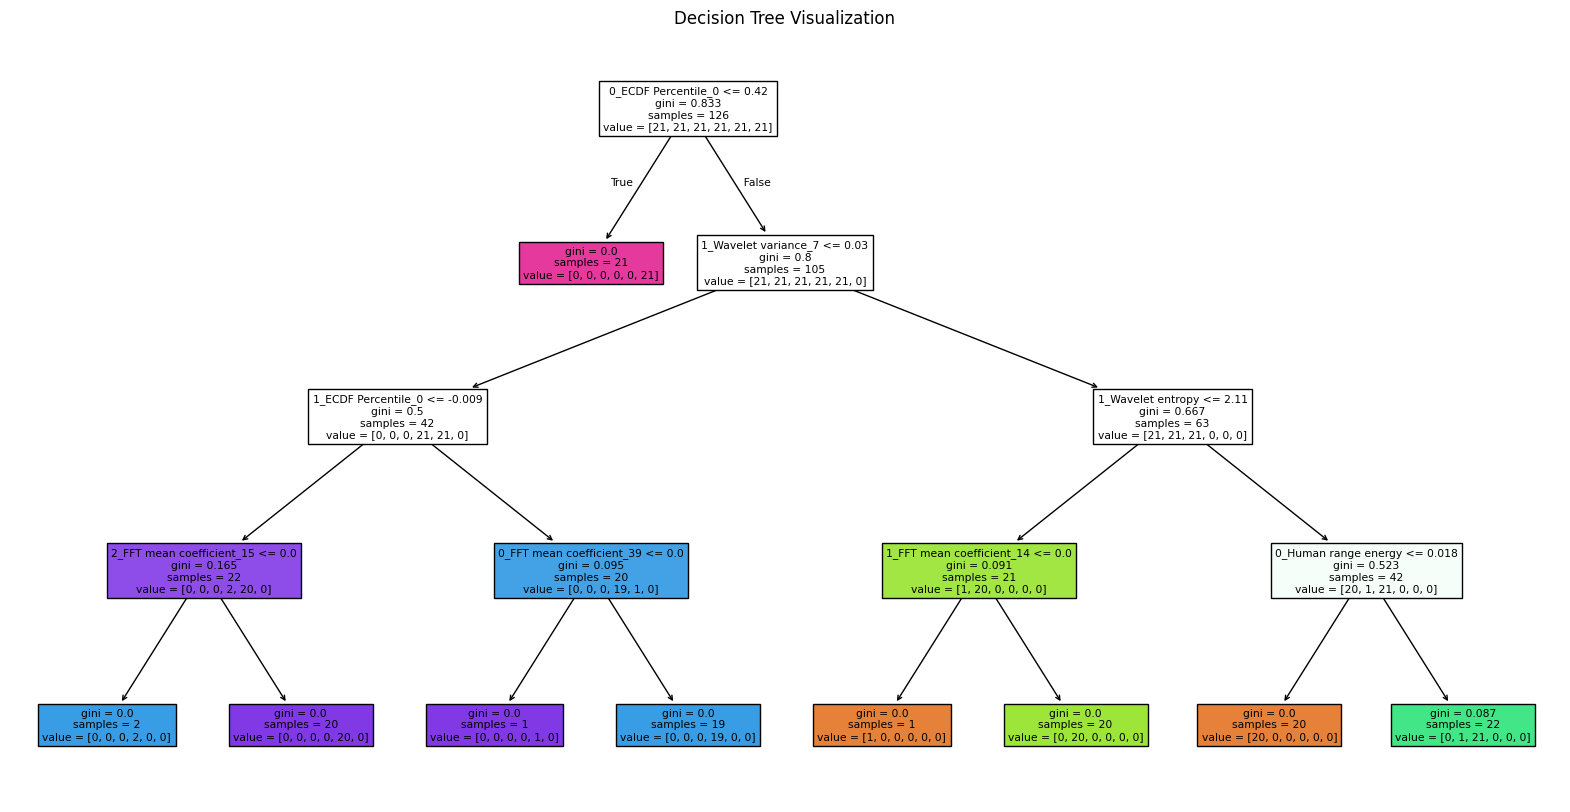

Accuracy: 0.7083
Recall: 0.7083
Precision: 0.7861

Confusion Matrix:

   1  2  3  4  5  6
1  4  0  0  0  0  0
2  1  2  1  0  0  0
3  0  1  3  0  0  0
4  0  0  0  0  4  0
5  0  0  0  0  4  0
6  0  0  0  0  0  4



In [9]:
decision_tree_TSFEL(feature_df,feature_df_test,Y_train,y_label,depth = 4)
print()

In [18]:
test_set = reshaped_array[::4]
train_set = np.delete(reshaped_array, np.arange(0, len(reshaped_array), 4), axis=0)
test_labels = y_label[::4]
train_labels = [y_label[i] for i in range(len(y_label)) if i % 4 != 0]

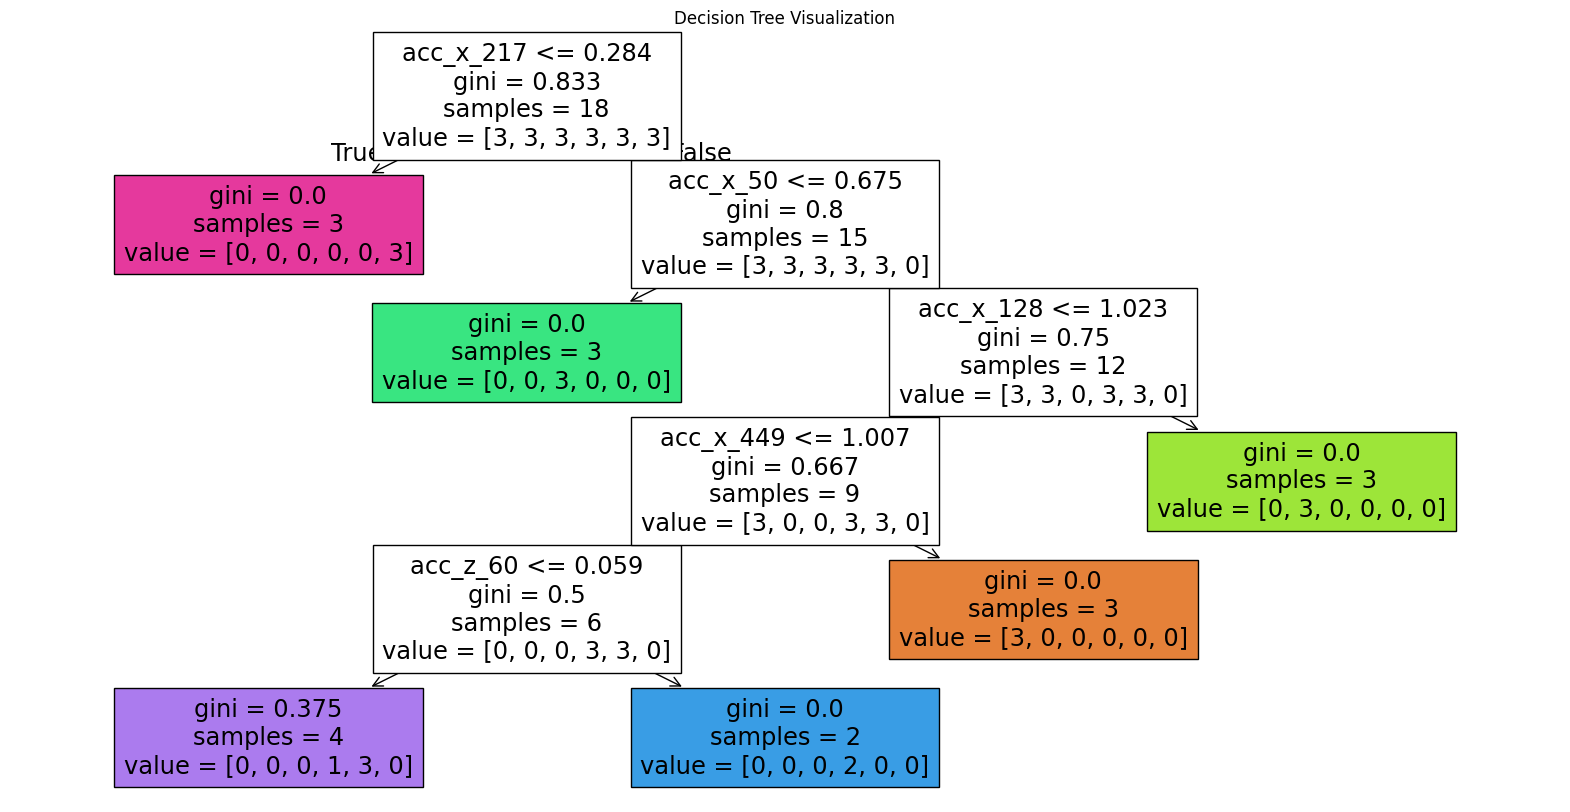

Accuracy: 0.6667
Recall: 0.6667
Precision: 0.8889

Confusion Matrix:

   1  2  3  4  5  6
1  0  0  1  0  0  0
2  0  0  1  0  0  0
3  0  0  1  0  0  0
4  0  0  0  1  0  0
5  0  0  0  0  1  0
6  0  0  0  0  0  1



In [20]:
decision_tree_raw(test_set,train_set,test_labels,train_labels,depth = 5)
print()

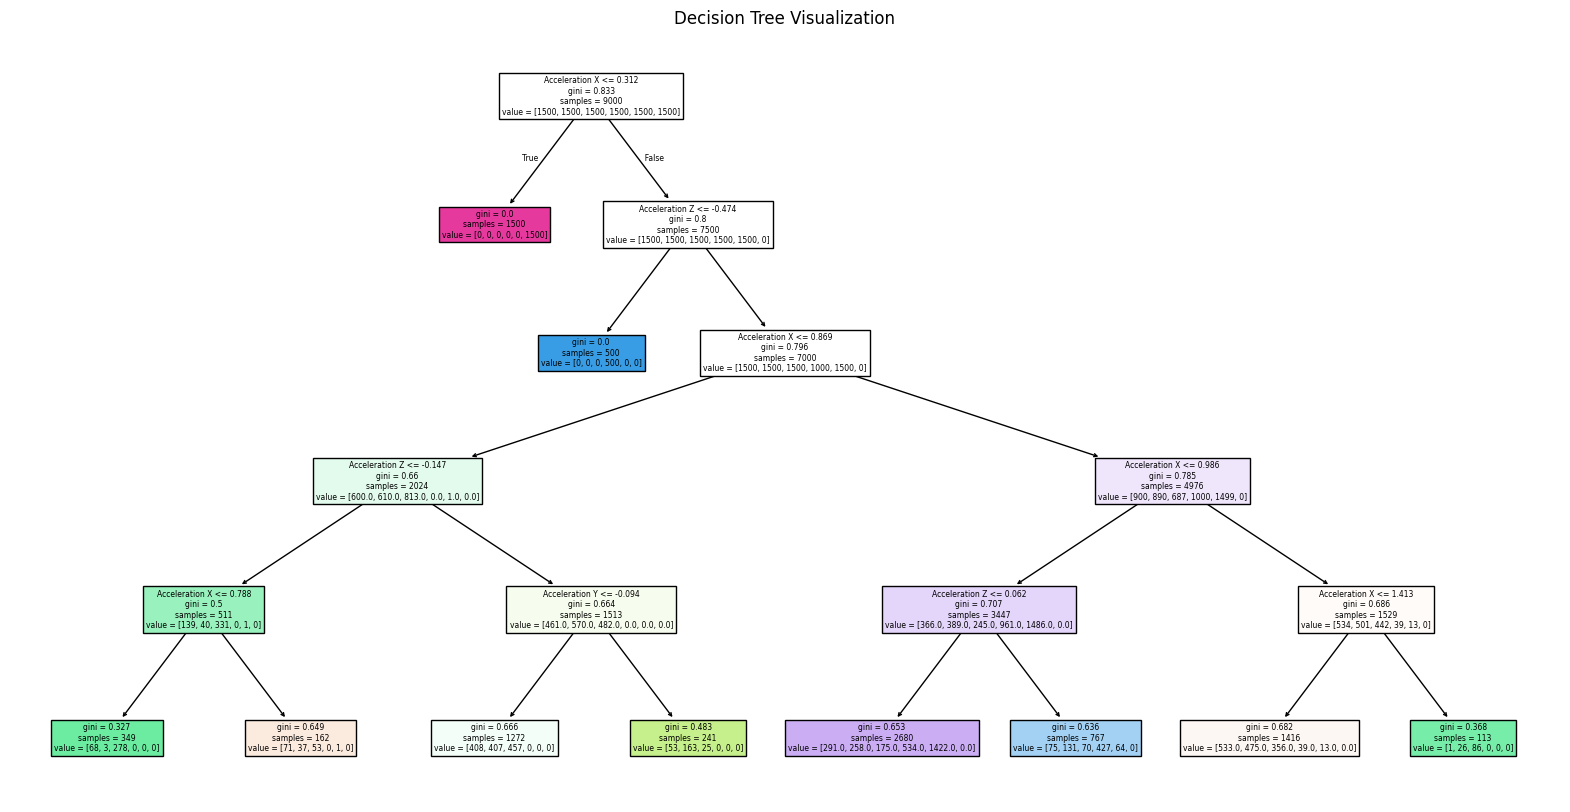

Accuracy: 0.6667
Recall: 0.6667
Precision: 0.8333

Confusion Matrix:

   1  2  3  4  5  6
1  1  0  0  0  0  0
2  1  0  0  0  0  0
3  0  0  1  0  0  0
4  0  0  0  0  1  0
5  0  0  0  0  1  0
6  0  0  0  0  0  1



In [21]:
decision_tree_raw2(test_set,train_set,test_labels,train_labels,depth = 5)
print()

In [22]:
cfg = tsfel.get_features_by_domain()
feature_df = tsfel.time_series_features_extractor(cfg, train_set, verbose = 0, fs = 50)
feature_df_test = tsfel.time_series_features_extractor(cfg, test_set, verbose = 0, fs = 50)

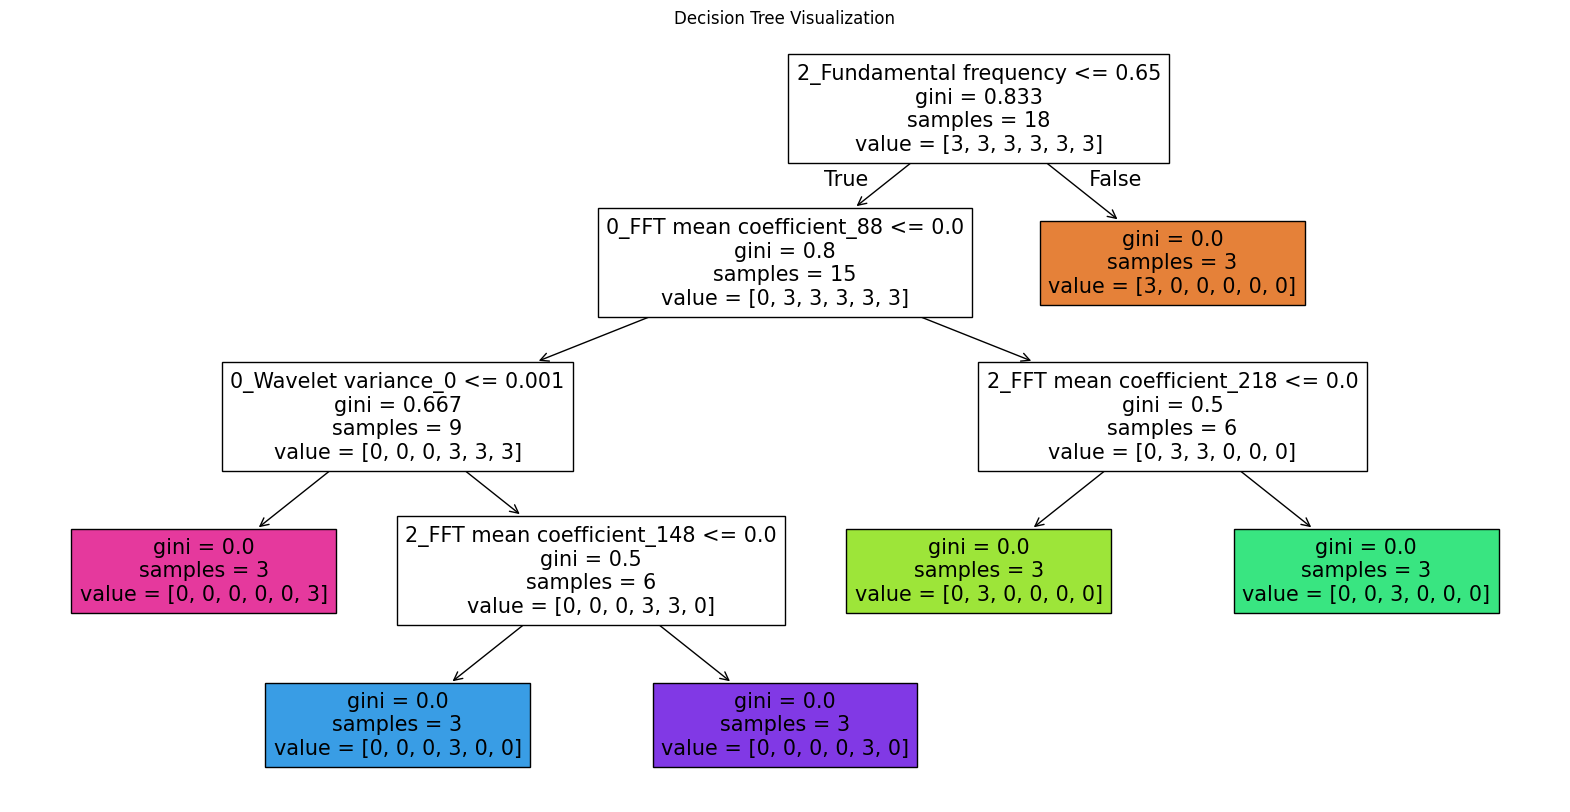

Accuracy: 0.5000
Recall: 0.5000
Precision: 0.7222

Confusion Matrix:

   1  2  3  4  5  6
1  1  0  0  0  0  0
2  0  0  1  0  0  0
3  0  0  1  0  0  0
4  0  0  1  0  0  0
5  0  0  0  0  1  0
6  0  1  0  0  0  0



In [24]:
decision_tree_TSFEL(feature_df,feature_df_test,train_labels,test_labels,depth = 4)
print()